# Q1

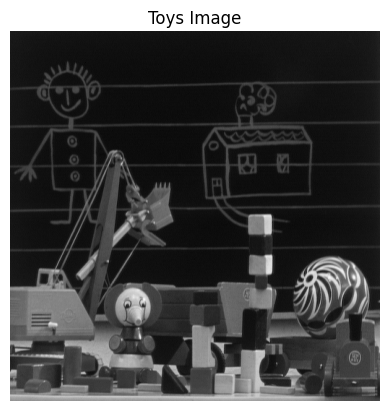

In [2]:
from PIL import Image
import matplotlib.pyplot as plt

# Load the image
image = Image.open('/content/toys.GIF')

# Display the image
plt.imshow(image, cmap='gray')
plt.title('Toys Image')
plt.axis('off')  # Hide axis
plt.show()


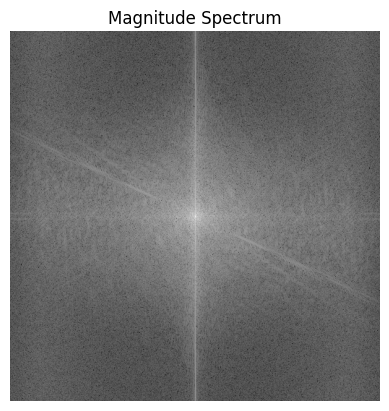

In [3]:
import numpy as np

# Convert image to grayscale and numpy array
image_gray = np.array(image.convert('L'))

# Compute the 2D FFT
fft_image = np.fft.fft2(image_gray)

# Shift the zero-frequency component to the center
fft_shifted = np.fft.fftshift(fft_image)

# Compute the magnitude spectrum
magnitude_spectrum = np.abs(fft_shifted)

# Display the magnitude spectrum
plt.imshow(np.log(magnitude_spectrum + 1), cmap='gray')
plt.title('Magnitude Spectrum')
plt.axis('off')  # Hide axis
plt.show()


# Q2

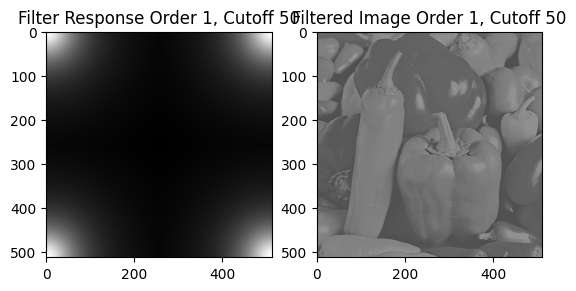

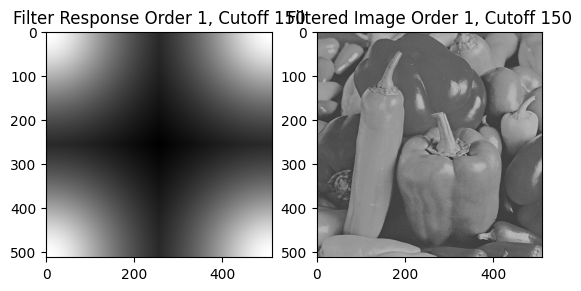

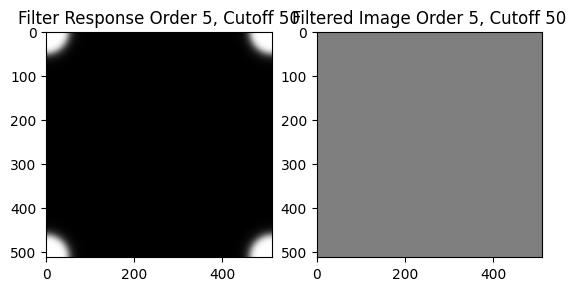

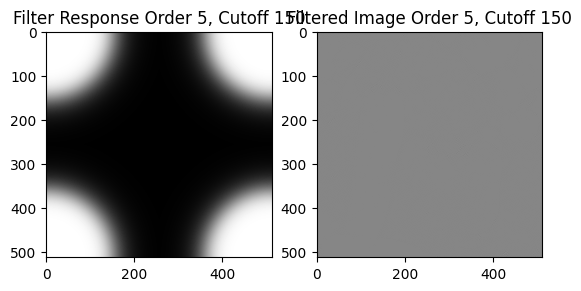

In [4]:
from scipy import signal

def butterworth_lowpass_filter(image_shape, cutoff, order):
    # Create a grid of coordinates (frequency)
    rows, cols = image_shape
    u = np.fft.fftfreq(rows, d=1/rows)
    v = np.fft.fftfreq(cols, d=1/cols)
    U, V = np.meshgrid(u, v)
    D = np.sqrt(U**2 + V**2)  # Distance in frequency space

    # Butterworth lowpass filter formula
    H = 1 / (1 + (D / cutoff)**(2 * order))

    return H

# Load the image and apply the Butterworth filter for each case
image_pepper = Image.open('pepper.jpg').convert('L')
image_pepper = np.array(image_pepper)

for order, cutoff in [(1, 50), (1, 150), (5, 50), (5, 150)]:
    # Design filter
    filter_response = butterworth_lowpass_filter(image_pepper.shape, cutoff, order)

    # Compute the FFT of the image
    fft_pepper = np.fft.fft2(image_pepper)
    fft_pepper_shifted = np.fft.fftshift(fft_pepper)

    # Apply the filter in the frequency domain
    filtered_fft = fft_pepper_shifted * filter_response

    # Inverse FFT to get the filtered image
    filtered_image = np.fft.ifft2(np.fft.ifftshift(filtered_fft)).real

    # Display the result
    plt.figure()
    plt.subplot(1, 2, 1)
    plt.imshow(np.log(np.abs(filter_response) + 1), cmap='gray')
    plt.title(f'Filter Response Order {order}, Cutoff {cutoff}')

    plt.subplot(1, 2, 2)
    plt.imshow(filtered_image, cmap='gray')
    plt.title(f'Filtered Image Order {order}, Cutoff {cutoff}')
    plt.show()


# Q3

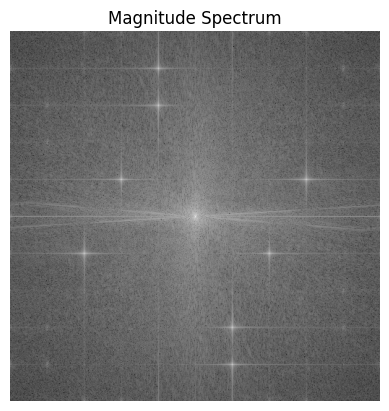

In [5]:
image_prob2 = Image.open('prob2_s2012.gif').convert('L')
image_prob2_array = np.array(image_prob2)

# Compute 2D FFT and magnitude spectrum
fft_prob2 = np.fft.fft2(image_prob2_array)
fft_prob2_shifted = np.fft.fftshift(fft_prob2)
magnitude_spectrum_prob2 = np.abs(fft_prob2_shifted)

plt.imshow(np.log(magnitude_spectrum_prob2 + 1), cmap='gray')
plt.title('Magnitude Spectrum')
plt.axis('off')
plt.show()


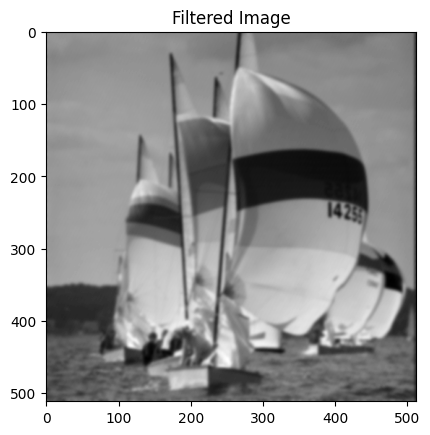

In [6]:
from scipy.ndimage import gaussian_filter

# Apply Gaussian lowpass filter
filtered_image_prob2 = gaussian_filter(image_prob2_array, sigma=2)

plt.imshow(filtered_image_prob2, cmap='gray')
plt.title('Filtered Image')
plt.show()


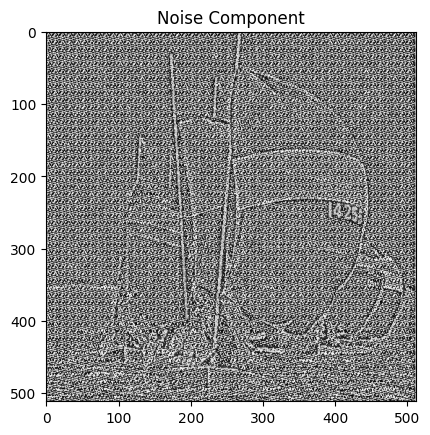

In [7]:
noise_component = image_prob2_array - filtered_image_prob2
plt.imshow(noise_component, cmap='gray')
plt.title('Noise Component')
plt.show()


# Q4

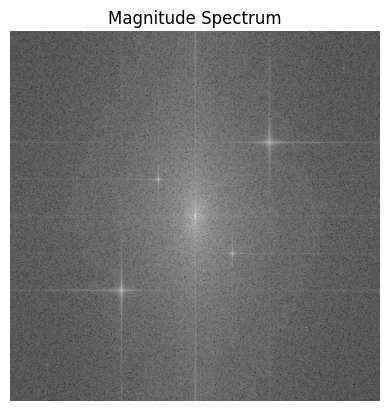

In [8]:
image_truck = Image.open('trucknoise.gif').convert('L')
image_truck_array = np.array(image_truck)

# Compute and display magnitude spectrum
fft_truck = np.fft.fft2(image_truck_array)
fft_truck_shifted = np.fft.fftshift(fft_truck)
magnitude_spectrum_truck = np.abs(fft_truck_shifted)

plt.imshow(np.log(magnitude_spectrum_truck + 1), cmap='gray')
plt.title('Magnitude Spectrum')
plt.axis('off')
plt.show()


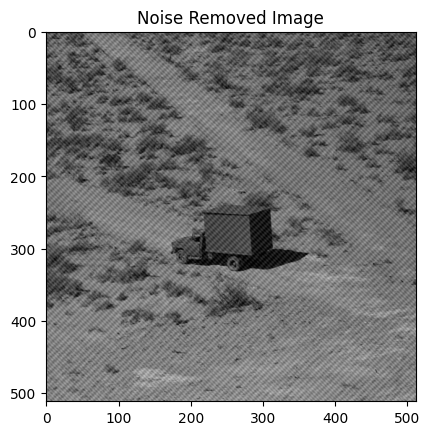

In [9]:
def notch_filter(image_shape, center, radius):
    rows, cols = image_shape
    u = np.fft.fftfreq(rows, d=1/rows)
    v = np.fft.fftfreq(cols, d=1/cols)
    U, V = np.meshgrid(u, v)
    D = np.sqrt((U - center[0])**2 + (V - center[1])**2)

    # Notch filter formula
    H = np.ones_like(D)
    H[D < radius] = 0  # Block the frequencies within the radius

    return H

# Design notch filter and apply it
filter_response = notch_filter(image_truck_array.shape, center=(0.1, 0.1), radius=0.05)

# Apply the filter in the frequency domain
fft_truck_filtered = fft_truck_shifted * filter_response

# Inverse FFT to get the filtered image
filtered_image_truck = np.fft.ifft2(np.fft.ifftshift(fft_truck_filtered)).real

plt.imshow(filtered_image_truck, cmap='gray')
plt.title('Noise Removed Image')
plt.show()


In [10]:
import math

# Load the original truck image
image_truck_original = Image.open('truck.gif').convert('L')
image_truck_original_array = np.array(image_truck_original)

# Compute PSNR
mse = np.mean((image_truck_original_array - filtered_image_truck) ** 2)
psnr = 20 * math.log10(255.0 / math.sqrt(mse))

print(f'PSNR: {psnr} dB')


PSNR: 24.595426932492288 dB
